In [313]:
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import new_wrangle

In [314]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

<hr style="border:2px solid black"> </hr>

# Acquire

In [315]:
df = new_wrangle.acquire_data()

In [316]:
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [317]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Type          6435 non-null   object 
 9   Size          6435 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 553.0+ KB


<hr style="border:2px solid black"> </hr>

# Prepare

In [318]:
df = new_wrangle.wrangle_walmart()

In [323]:
pd.set_option('display.max_columns', None)
df.columns.tolist()

['store_id',
 'weekly_sales',
 'holiday_flag',
 'temperature',
 'fuel_price',
 'CPI',
 'unemployment',
 'store_type',
 'store_size',
 'holiday_name',
 'month',
 'year',
 'quarter',
 'weekday',
 'week_of_year',
 'deflated_series',
 'sales_delta_weekly',
 'sales_delta_yearly',
 'gas_delta_weekly',
 'gas_delta_yearly',
 'last_year_sales',
 'last_week_sales',
 'pre_christmas',
 'tax_season',
 'season']

In [336]:
df[df.tax_season==1]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [76]:
#train test split
train, test, X_train, y_train, X_test, y_test = new_wrangle.train_test(df, 'weekly_sales')

train -> (4504, 25)
test -> (1931, 25)


<hr style="border:2px solid black"> </hr>

## Exploration: Aggregate Data 

### Visualizing Target Versus Features

Text(0.5, 1.0, 'Average Temperature by Month')

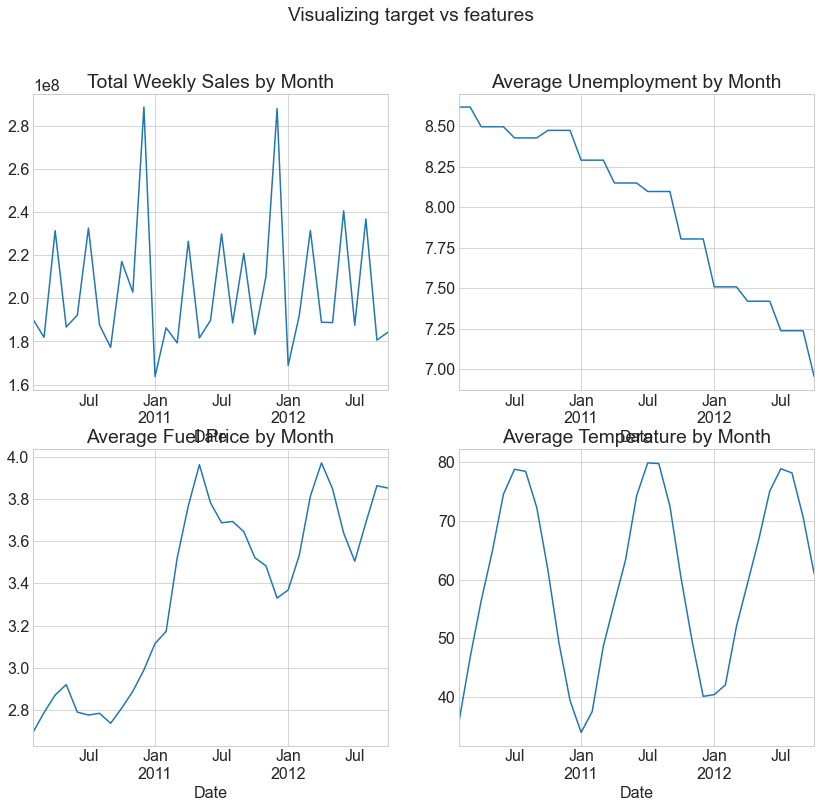

In [215]:

fig = plt.figure(figsize=(14, 12))
fig.suptitle('Visualizing target vs features')

plt.subplot(2, 2, 1)
df.weekly_sales.resample('M').sum().plot()
plt.xticks(rotation=0)
plt.title('Total Weekly Sales by Month')

plt.subplot(2, 2, 2)
df.unemployment.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Unemployment by Month')

plt.subplot(2, 2, 3)
df.fuel_price.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Fuel Price by Month')

plt.subplot(2, 2, 4)
df.temperature.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Temperature by Month')

***
Takeaways from aggregate monthly resampling: 
* deflated sales spike significantly over the Nov-Dec months only to nosedive to annual lows in January
    * a rebound in sales during Feb after cyclical lows in Jan 
        * much milder spikes appear consistent in the months of June and August
* avg unemployment shows a clear declining trend whild avg fuel price shows a clear rising trend
* seasonality in both the avg deflated sales and avg temperature occurs over an annual basis
***

### Visualizing Target and Feature Delta

Text(0.5, 1.0, 'Average Monthly YoY change - Temperature ')

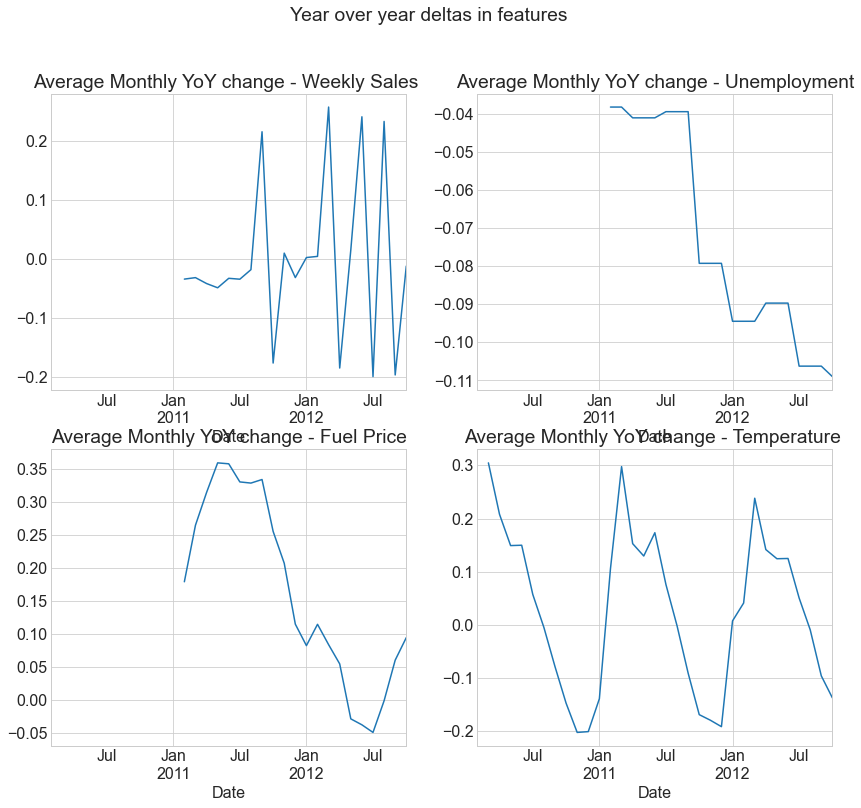

In [213]:
# Year over year changes
fig = plt.figure(figsize=(14, 12))
fig.suptitle('Year over year deltas in features')

plt.subplot(2, 2, 1)
df.deflated_series.resample('M').sum().pct_change(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Weekly Sales ')

plt.subplot(2, 2, 2)
df.unemployment.resample('M').mean().pct_change(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Unemployment')

plt.subplot(2, 2, 3)
df.fuel_price.resample('M').mean().pct_change(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Fuel Price')

plt.subplot(2, 2, 4)
df.temperature.resample('M').mean().pct_change().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Temperature ')

***
Takeaways: 
* avg year-over-year delta on deflated sales appears to have no trend or seasonality
* ang yoy delta on uneployment and fuel prices hav a negative trend
    * hypothesis: price declines lead to higher sales; is there a lag
***

Text(0.5, 1.0, 'Average Monthly MoM change - Temperature ')

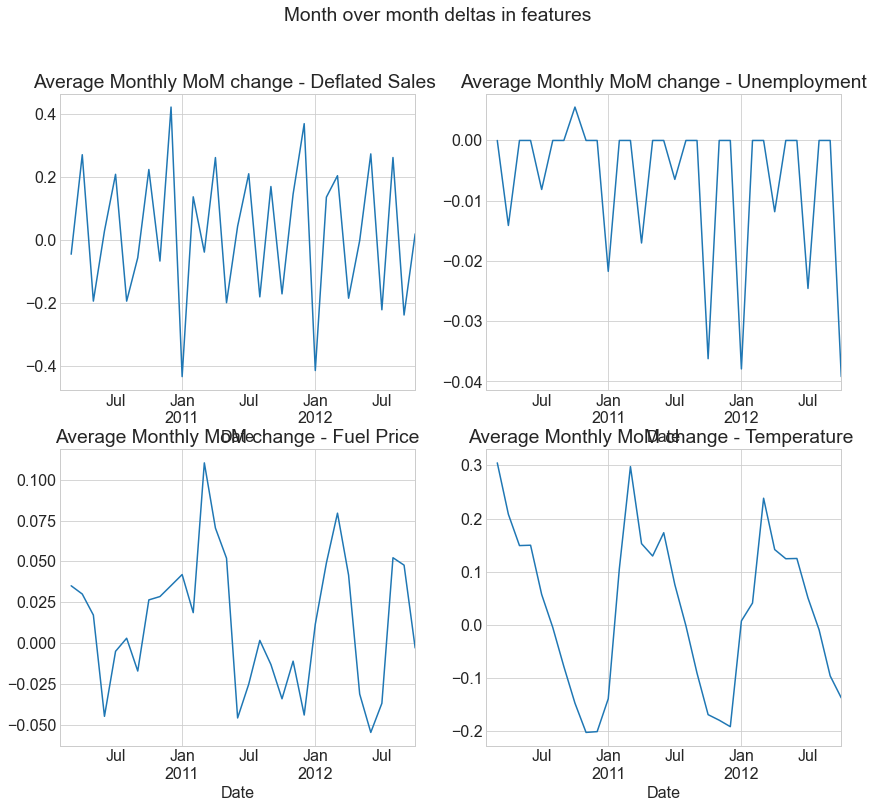

In [211]:
# Month over month changes
fig = plt.figure(figsize=(14, 12))
fig.suptitle('Month over month deltas in features')

plt.subplot(2, 2, 1)
df.weekly_sales.resample('M').sum().pct_change(1).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Deflated Sales ')

plt.subplot(2, 2, 2)
df.unemployment.resample('M').mean().pct_change(1).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Unemployment')

plt.subplot(2, 2, 3)
df.fuel_price.resample('M').mean().pct_change(1).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Fuel Price')

plt.subplot(2, 2, 4)
df.temperature.resample('M').mean().pct_change(1).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Temperature ')

***
Takeaways: 
* the month-over-month deltas show plenty of seasonality but no clear trends identifiable from visuals
***

<AxesSubplot:title={'center':'Annual Weekly Sales by Month'}, xlabel='Date'>

<Figure size 1008x576 with 0 Axes>

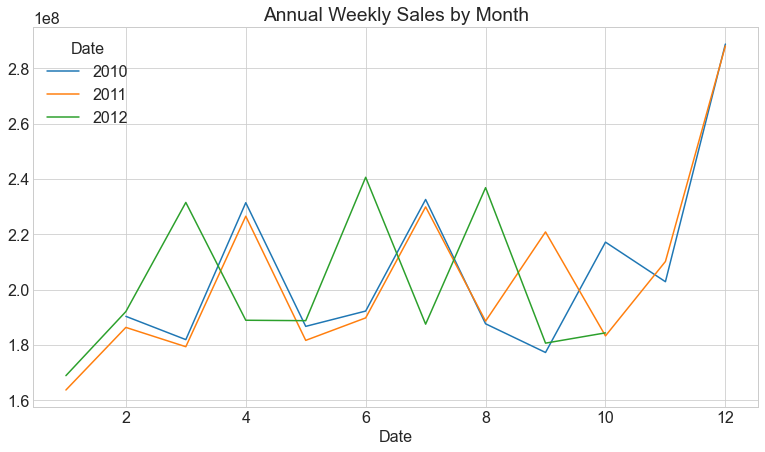

In [210]:
# Annual weekly sales by month
plt.figure(figsize=(14, 8)) 
df.weekly_sales.groupby([df.index.year, df.index.month]).sum().unstack(0).plot(title='Annual Weekly Sales by Month')

***
Takeaways:
* Seasonal patterns hold across years
    * March/April 2012, September/October 2011 act in opposition
        * Data exploration revealed that these are due to calendar effects that promote data creep from one month to the next.  Taking note but not making an adjustment to data
***

### Visualizing Target Lags

Text(0.5, 1.0, 'Lag plot with lag=52')

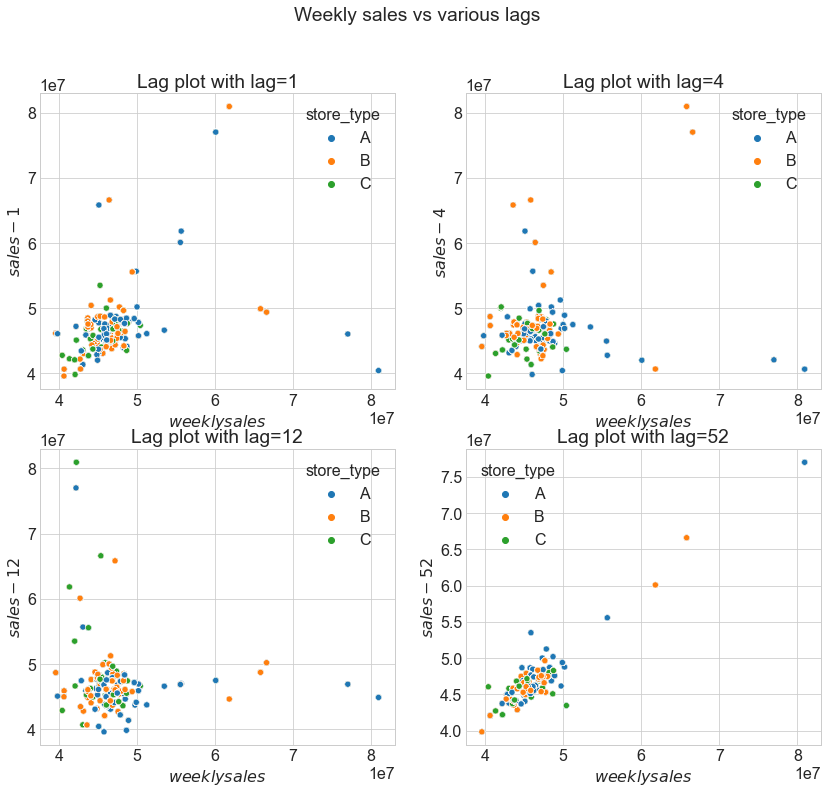

In [208]:
# Various Target Lag plots

fig = plt.figure(figsize=(14, 12))
fig.suptitle('Weekly sales vs various lags')

plt.subplot(2, 2, 1)
sns.scatterplot(df.groupby('Date').weekly_sales.agg('sum'), df.groupby('Date').weekly_sales.agg('sum').shift(-1), hue=df.store_type)
plt.xlabel('$weekly sales$')
plt.ylabel('$sales - 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(df.groupby('Date').weekly_sales.agg('sum'), df.groupby('Date').weekly_sales.agg('sum').shift(-4), hue=df.store_type)
plt.xlabel('$weekly sales$')
plt.ylabel('$sales - 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(df.groupby('Date').weekly_sales.agg('sum'), df.groupby('Date').weekly_sales.agg('sum').shift(-12), hue=df.store_type)
plt.xlabel('$weekly sales$')
plt.ylabel('$sales - 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(df.groupby('Date').weekly_sales.agg('sum'), df.groupby('Date').weekly_sales.agg('sum').shift(-52), hue=df.store_type)
plt.xlabel('$weekly sales$')
plt.ylabel('$sales - 52$')
plt.title('Lag plot with lag=52')

#### Investigate anomalies in lag 1

In [186]:
# Separate aggregated weekly sales data into current and lagged series
m = pd.Series(df.groupby('Date').weekly_sales.agg('sum'), name = 'm')
n = pd.Series(df.groupby('Date').weekly_sales.agg('sum').shift(-1), name = 'n')

In [187]:
# concat the series into a dataframe and extract observations that appear to violate the linear relationship
pd.set_option('display.max_rows', None)
df_lag1 = pd.concat([m, n], axis=1)

In [188]:
# x-axis anomalous prints
df_lag1[df_lag1.m>62500000]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [189]:
# y-axis anomalous prints
df_lag1[df_lag1.n>62500000]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

***
Takeways:
* There is a clear linear correlation when lagging the data on an annual basis (52 weeks)
* There also appears to be some correlation when lagging on a monthly basis
    * outliers appear evenly distributed across store size groupings and appear to mirror each other suggesting the same time periods may be mirrored
        * perhaps these are due to the holiday periods; check to see if any possibility of addressing
            * CONFIRMED: the outliers occur in consecutive dates surrounding the Thanksgiving and Christmas holidays.  Specifically, [2010-11-19, 2010-11-26, 2010-12-17, 2010-12-24, 2011-11-18, 2011-11-25, 2011-12-16, 2011-12-23]
***


### Visualizing Target Lags by Store Type

In [115]:
# Separate df by store type
a = df[df.store_type == 'A']
b = df[df.store_type == 'B']
c = df[df.store_type == 'C']

a.shape, b.shape, c.shape

((2860, 25), (2145, 25), (1430, 25))

Text(0.5, 1.0, 'Lag plot with lag=52')

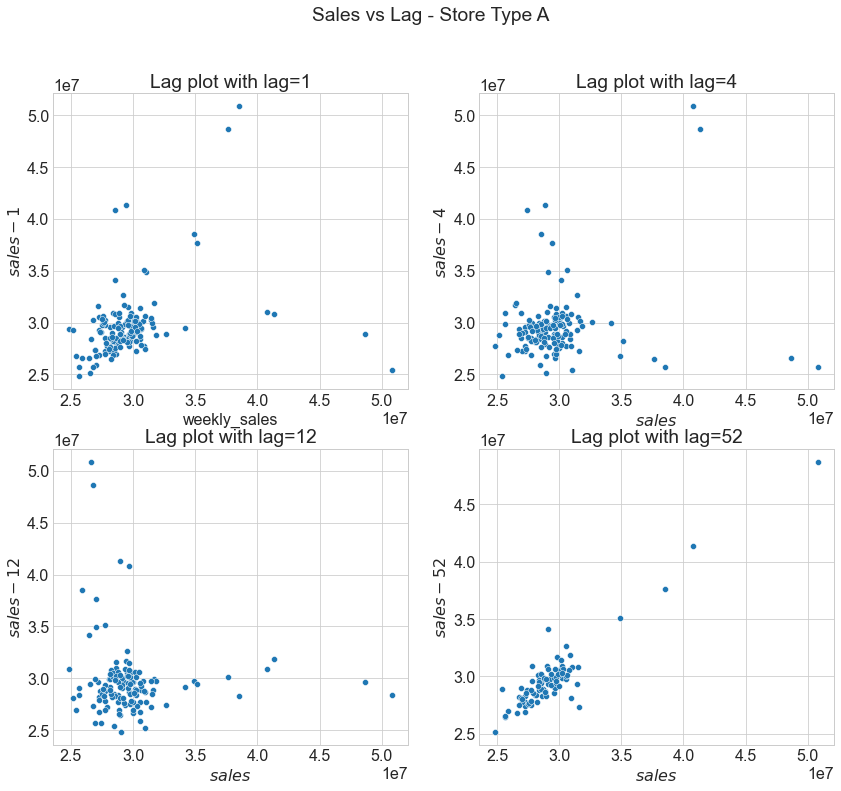

In [200]:
# Various Target Lag plots

fig = plt.figure(figsize=(14, 12))
fig.suptitle('Sales vs Lag - Store Type A')

plt.subplot(2, 2, 1)
sns.scatterplot(a.groupby('Date').weekly_sales.agg('sum'), a.groupby('Date').weekly_sales.agg('sum').shift(-1))
plt.ylabel('$sales - 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(a.groupby('Date').weekly_sales.agg('sum'), a.groupby('Date').weekly_sales.agg('sum').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales - 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(a.groupby('Date').weekly_sales.agg('sum'), a.groupby('Date').weekly_sales.agg('sum').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales - 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(a.groupby('Date').weekly_sales.agg('sum'), a.groupby('Date').weekly_sales.agg('sum').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales - 52$')
plt.title('Lag plot with lag=52')

Text(0.5, 1.0, 'Lag plot with lag=52')

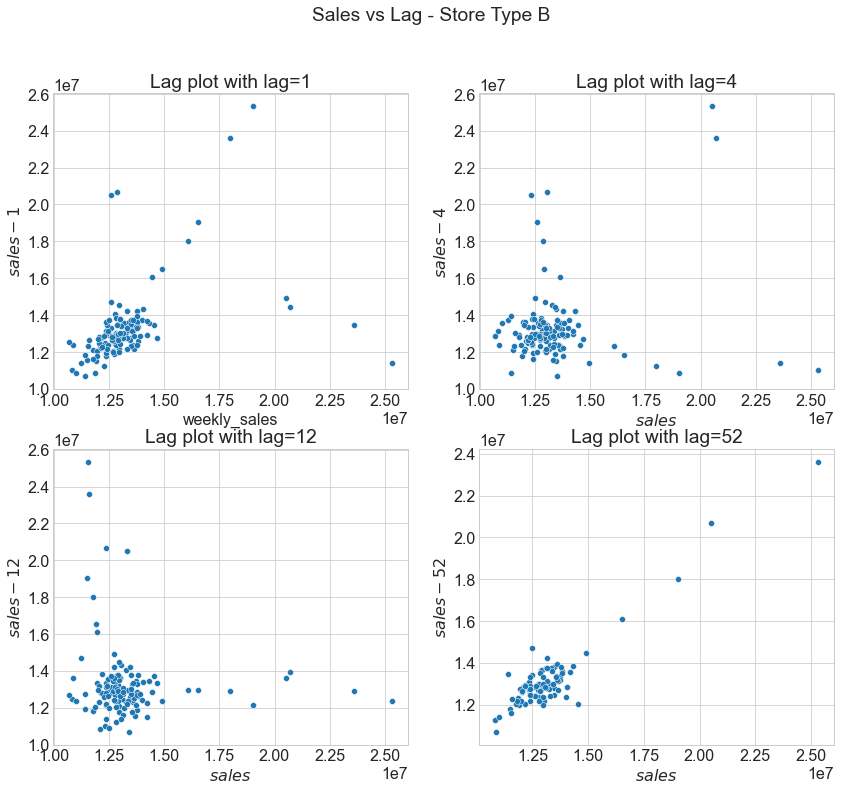

In [201]:
# Various Target Lag plots

fig = plt.figure(figsize=(14, 12))
fig.suptitle('Sales vs Lag - Store Type B')

plt.subplot(2, 2, 1)
sns.scatterplot(b.groupby('Date').weekly_sales.agg('sum'), b.groupby('Date').weekly_sales.agg('sum').shift(-1))
plt.ylabel('$sales - 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(b.groupby('Date').weekly_sales.agg('sum'), b.groupby('Date').weekly_sales.agg('sum').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales - 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(b.groupby('Date').weekly_sales.agg('sum'), b.groupby('Date').weekly_sales.agg('sum').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales - 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(b.groupby('Date').weekly_sales.agg('sum'), b.groupby('Date').weekly_sales.agg('sum').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales - 52$')
plt.title('Lag plot with lag=52')

Text(0.5, 1.0, 'Lag plot with lag=52')

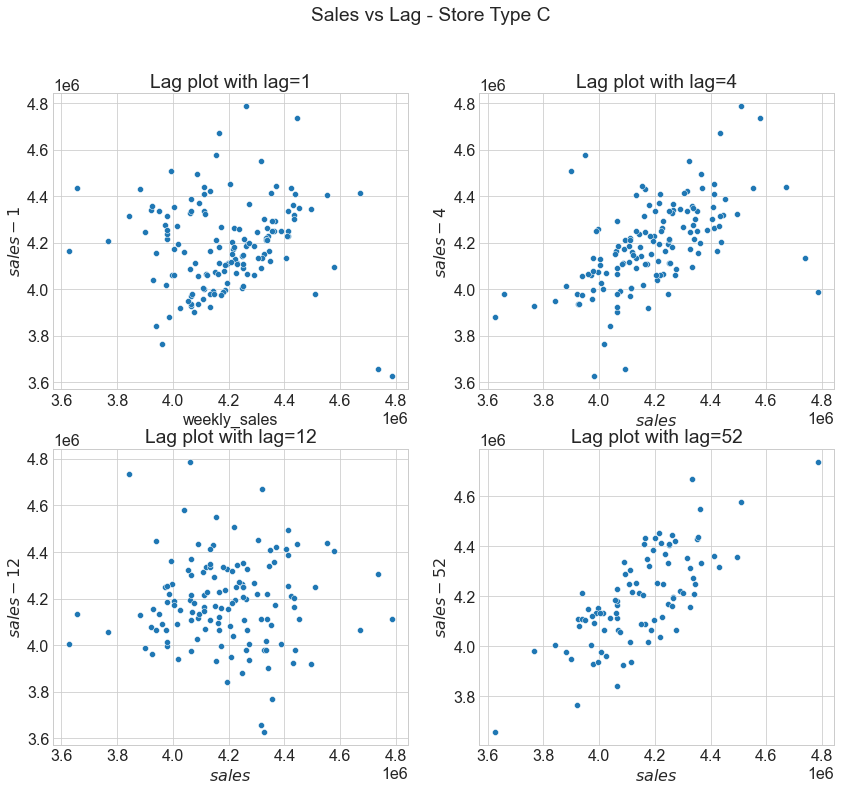

In [202]:
# Various Target Lag plots

fig = plt.figure(figsize=(14, 12))
fig.suptitle('Sales vs Lag - Store Type C')

plt.subplot(2, 2, 1)
sns.scatterplot(c.groupby('Date').weekly_sales.agg('sum'), c.groupby('Date').weekly_sales.agg('sum').shift(-1))
plt.ylabel('$sales - 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(c.groupby('Date').weekly_sales.agg('sum'), c.groupby('Date').weekly_sales.agg('sum').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales - 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(c.groupby('Date').weekly_sales.agg('sum'), c.groupby('Date').weekly_sales.agg('sum').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales - 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(c.groupby('Date').weekly_sales.agg('sum'), c.groupby('Date').weekly_sales.agg('sum').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales - 52$')
plt.title('Lag plot with lag=52')

***
Takeaways:
* separating the sales data by store size continues to support the overall findings above
* NOTEWORTHY: sales in the smaller stores doesn't appear to hold as strong of a correlation as the larger stores especially when examining the data lagged on a weekly basis
    * interstingly, this data does suggest some linear correlation over a monthly lag (4 weeks) where the larger stores do not
***   

### AutoCorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

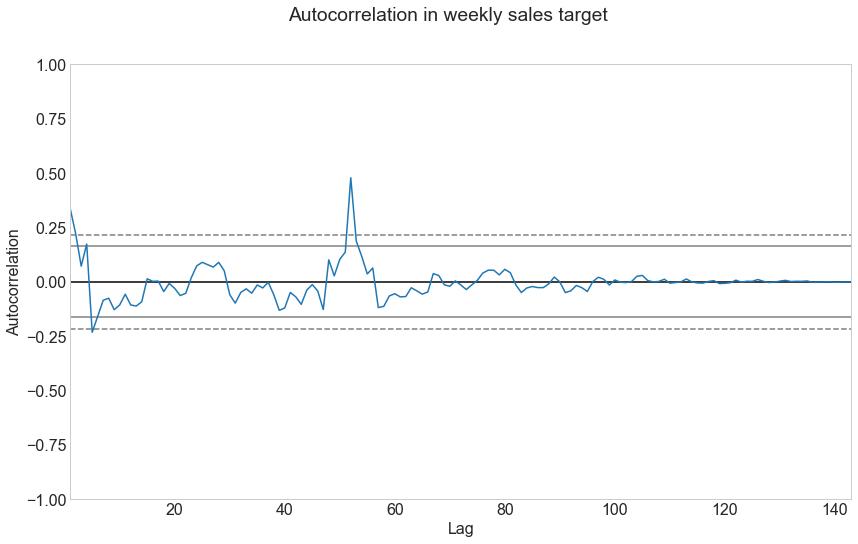

In [216]:

fig = plt.figure(figsize=(14, 8))
fig.suptitle('Autocorrelation in weekly sales target')
pd.plotting.autocorrelation_plot(df.weekly_sales.resample('W').mean())

***
Takeaways:
* For the most part, the chart is showing little sales autocorrelation outiside of the 1 week and 52 week lags we identified earlier
***

In [135]:
y = df.weekly_sales.resample('M').sum()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head(15)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Date'>

<Figure size 1008x576 with 0 Axes>

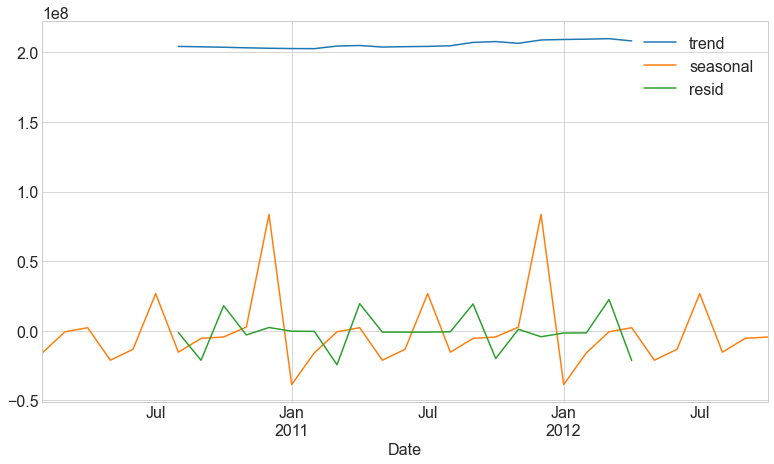

In [226]:
# Weekly sales Decomposed
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
plt.figure(figsize=(14, 8)) 
decomposition.iloc[:, 1:].plot()

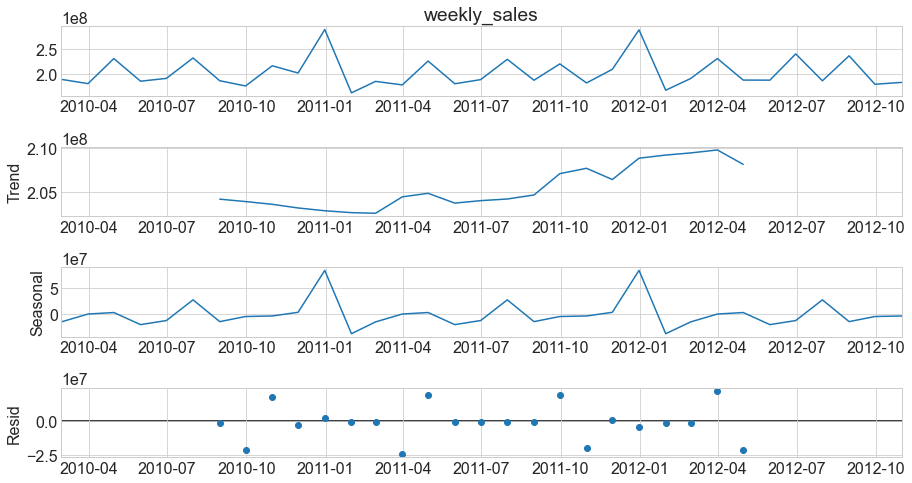

In [230]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
sm.tsa.seasonal_decompose(df.weekly_sales.resample('M').sum()).plot()
plt.show()

***
Decomposition Takeaways:
* Slightly positive long term trend identifiable
    * perhaps due to inflation bias; prior expoloration on real sales showed slightly declining trend
* Again, seasonality around the holidays identified
* Residuals oddly reciprocated at each tail.  I do not understand
***

### Smoothing the target w/rolling averages

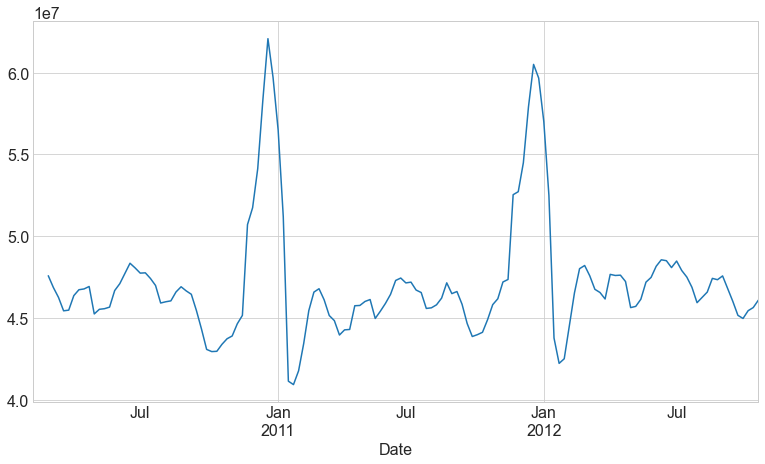

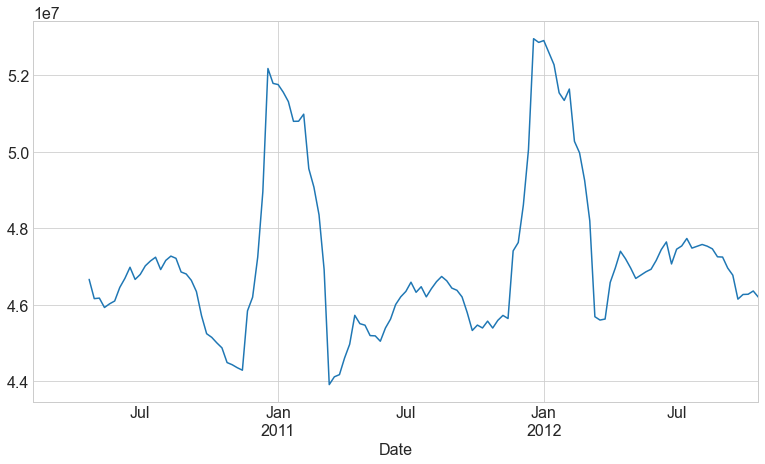

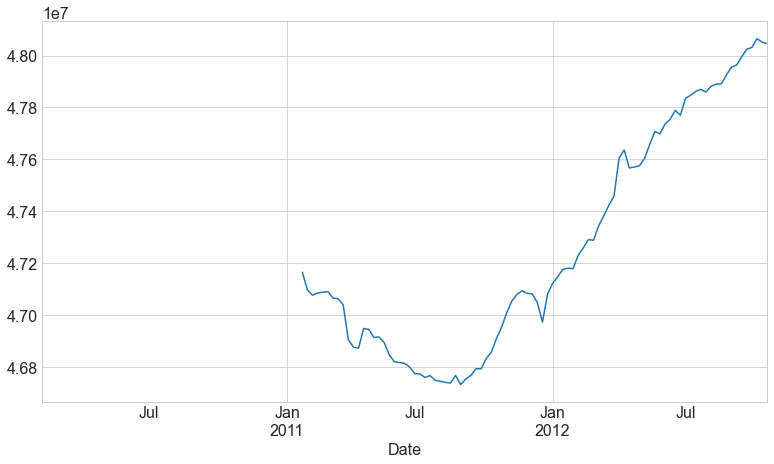

In [204]:
# visualize entire data using 1 month & 1 qtr or 4 & 12 week rolling averages
horizon = [4, 12, 52]
for h in horizon:
    df.weekly_sales.groupby('Date').agg('sum').rolling(h).mean().plot()
    plt.show()

***
Takeaways:
* Smoothed charts still identify strong seasonality around Nov/Dec and an rising trend
***

# Exploring Feature lags vs target

### Fuel Price vs target

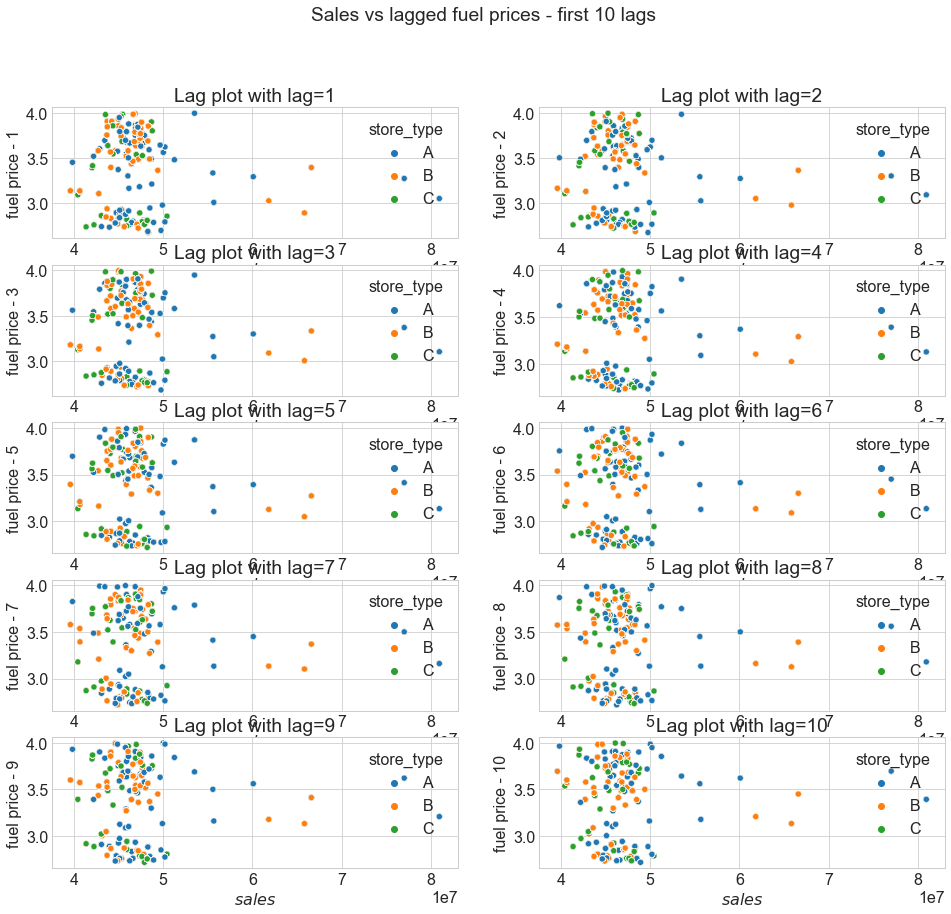

In [254]:
fig = plt.figure(figsize=(16, 14))
fig.suptitle('Sales vs lagged fuel prices - first 10 lags')

for i in range(1,11):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df, x=df.groupby('Date').weekly_sales.agg('sum'), y=df.groupby('Date').fuel_price.agg('mean').shift(-i), hue='store_type')
    plt.xlabel('$sales$')
    plt.ylabel(f'fuel price - {i}')
    plt.title(f'Lag plot with lag={i}')

Text(0.5, 1.0, 'Lag plot with lag=52')

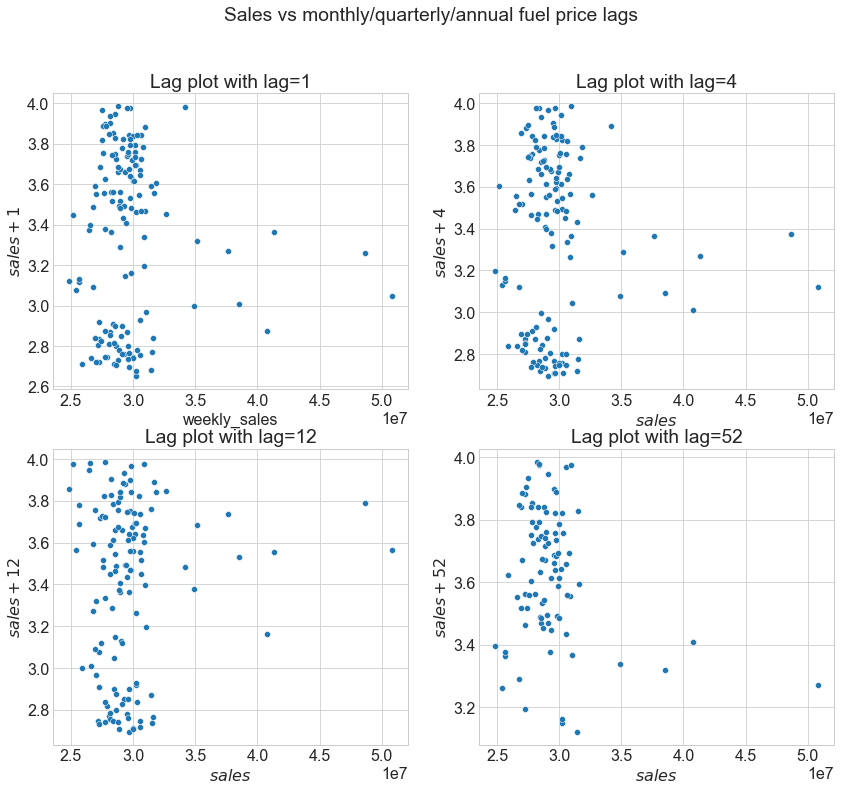

In [284]:
fig = plt.figure(figsize=(14, 12))
fig.suptitle('Sales vs monthly/quarterly/annual fuel price lags')

plt.subplot(2, 2, 1)
sns.scatterplot(a.resample('w').weekly_sales.agg('sum'), a.resample('w').fuel_price.agg('mean').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(a.resample('w').weekly_sales.agg('sum'), a.resample('w').fuel_price.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(a.resample('w').weekly_sales.agg('sum'), a.resample('w').fuel_price.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(a.resample('w').weekly_sales.agg('sum'), a.resample('w').fuel_price.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

***
Takeaways:
* Not seeing any associations on either the short or long term lags
***

### Unemployment vs target

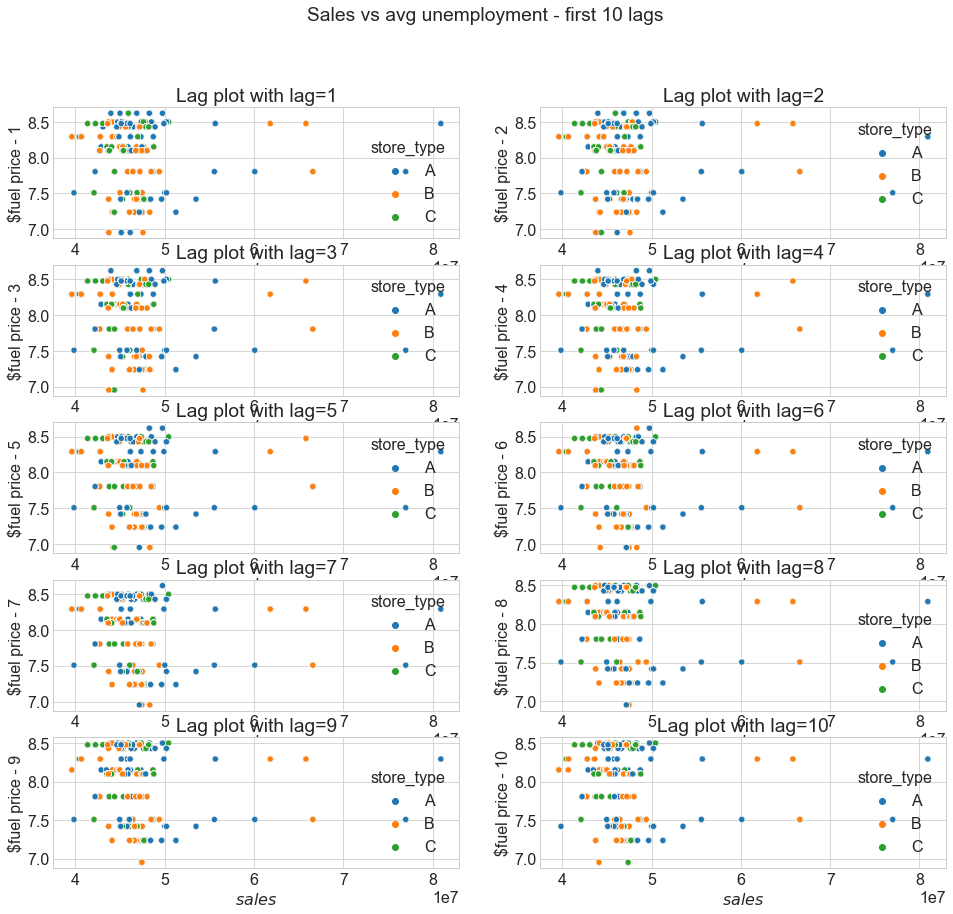

In [258]:
fig = plt.figure(figsize=(16, 14))
fig.suptitle('Sales vs avg unemployment - first 10 lags')

for i in range(1,11):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df, x=df.groupby('Date').weekly_sales.agg('sum'), y=df.groupby('Date').unemployment.agg('mean').shift(-i), hue='store_type')
    plt.xlabel('$sales$')
    plt.ylabel(f'$fuel price - {i}')
    plt.title(f'Lag plot with lag={i}')

Text(0.5, 1.0, 'Lag plot with lag=52')

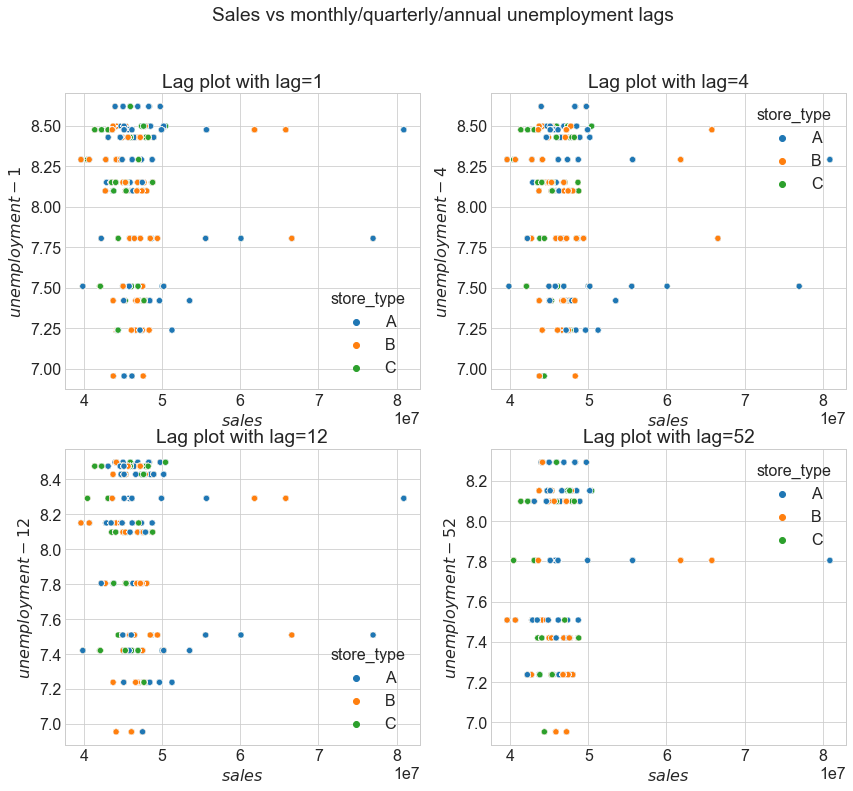

In [285]:
fig = plt.figure(figsize=(14, 12))
fig.suptitle('Sales vs monthly/quarterly/annual unemployment lags')

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x=df.groupby('Date').weekly_sales.agg('sum'), y=df.groupby('Date').unemployment.agg('mean').shift(-1), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$unemployment - 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x= df.groupby('Date').weekly_sales.agg('sum'), y=df.groupby('Date').unemployment.agg('mean').shift(-4), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$unemployment - 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x=df.groupby('Date').weekly_sales.agg('sum'), y=df.groupby('Date').unemployment.agg('mean').shift(-12), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$unemployment - 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x=df.groupby('Date').weekly_sales.agg('sum'), y=df.groupby('Date').unemployment.agg('mean').shift(-52), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$unemployment - 52$')
plt.title('Lag plot with lag=52')

***
Takeaways:
* Not seeing any associations on either the short or long term lags
***

### MoM delta for weekly sales and fuel price

Text(0.5, 1.0, 'MoM delta on monthly sales vs lag-1 MoM delta on avg monthly fuel prices')

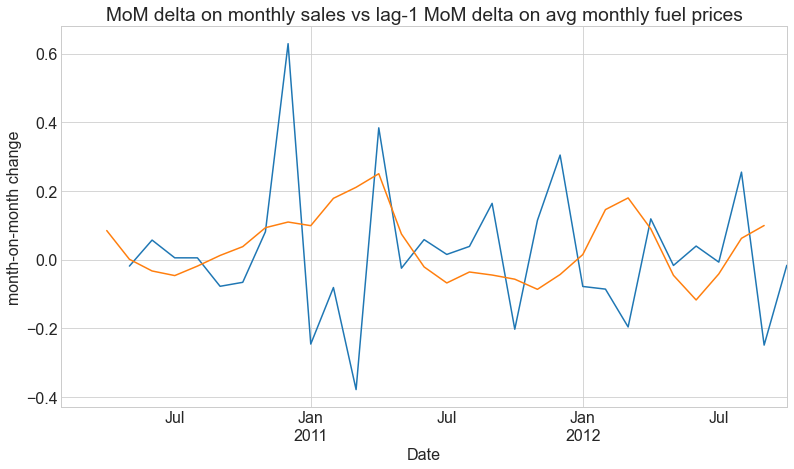

In [339]:
df.weekly_sales.resample('M').sum().pct_change(3).plot()
df.fuel_price.resample('M').mean().pct_change(3).shift(-1).plot()
plt.ylabel('month-on-month change')
plt.title('MoM delta on monthly sales vs lag-1 MoM delta on avg monthly fuel prices')

***
Takeaway:
   * There does appear to be some relationship between the rate of change in weekly_sales aggregated monthly and the rate of change in avg monthly fuel prices lagged by 1 period
***

## Import Modeling 

In [344]:
from scipy import stats
import math

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, explained_variance_score

In [364]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame({'actual': y_train})
y_test = pd.DataFrame({'actual': y_test})

ValueError: If using all scalar values, you must pass an index

#### Baseline

In [346]:
#create the baseline
baseline= y_train['actual'].mean()

In [347]:
#create column called baseline to compare
y_train['baseline'] = baseline

In [348]:
#calculate RMSE for baseline model
rmse_baseline_train= math.sqrt(mean_squared_error(y_train.actual, y_train.baseline))

In [350]:
#create a dataframe to make data easier to visualize/understand
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_train': round(rmse_baseline_train, 5)
}])

metric_df
#we now have out baseline model to work off of

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [352]:
X_train.columns

Index(['store_id', 'holiday_flag', 'temperature', 'fuel_price', 'CPI',
       'unemployment', 'store_type', 'store_size', 'holiday_name', 'month',
       'year', 'quarter', 'weekday', 'week_of_year', 'deflated_series',
       'sales_delta_weekly', 'sales_delta_yearly', 'gas_delta_weekly',
       'gas_delta_yearly', 'last_year_sales', 'last_week_sales',
       'pre_christmas', 'tax_season', 'season'],
      dtype='object')

In [353]:
#set features
#we do not want to include all columns in this because it could cause overfitting
features = ['store_size', 'unemployment', 'week_of_year', 'sales_delta_weekly']

## OLS Model

In [355]:
#ordinary least squares
#create the model 
model1 = LinearRegression(normalize=True)

#fit the model
model1.fit(X_train[features], y_train.actual)

LinearRegression(normalize=True)

In [356]:
# predict train
y_train['sales_pred_lm'] = model1.predict(X_train[features])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.actual, y_train.sales_pred_lm)**(1/2)

In [357]:
#create visual to see baseline vs LinearRegression model
metric_df = metric_df.append(
    {
    'model': 'Model 1: OLS',
    'rmse_train': round(rmse_train, 5),
    }, ignore_index=True)

metric_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Lasso Lars

In [358]:
# create the model object
model2 = LassoLars(alpha= 2)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
model2.fit(X_train[features], y_train.actual)

# predict train
y_train['sales_pred_lars'] = model2.predict(X_train[features])

# evaluate: rmse
rmse_train = mean_squared_error(y_train.actual, y_train.sales_pred_lars)**(1/2)

In [359]:
#shows baseline vs LinearRegression vs LassoLars
metric_df = metric_df.append(
    {
    'model': 'Model 2: LassoLars (alpha 2)',
    'rmse_train': round(rmse_train,5),
    }, ignore_index=True)

metric_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Polynomial Regression

In [361]:
#make the polynomial features to get a new set of features
model3 = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled features
X_train_degree2 = model3.fit_transform(X_train[features])



In [362]:
#create the model
lm2 = LinearRegression(normalize=True)

#fit the mode
lm2.fit(X_train_degree2, y_train.actual)

#use the model
y_train['sale_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_model3 = mean_squared_error(y_train.actual, y_train.sale_pred_lm2) ** (1/2)

In [363]:
#shows baseline vs LinearRegression vs LassoLars
metric_df = metric_df.append(
    {
    'model': 'Model 3: Polynomial Regression (degree=2)',
    'rmse_train': round(rmse_train_model3,5),
    }, ignore_index=True)

metric_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [368]:
y_train.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Evaluate

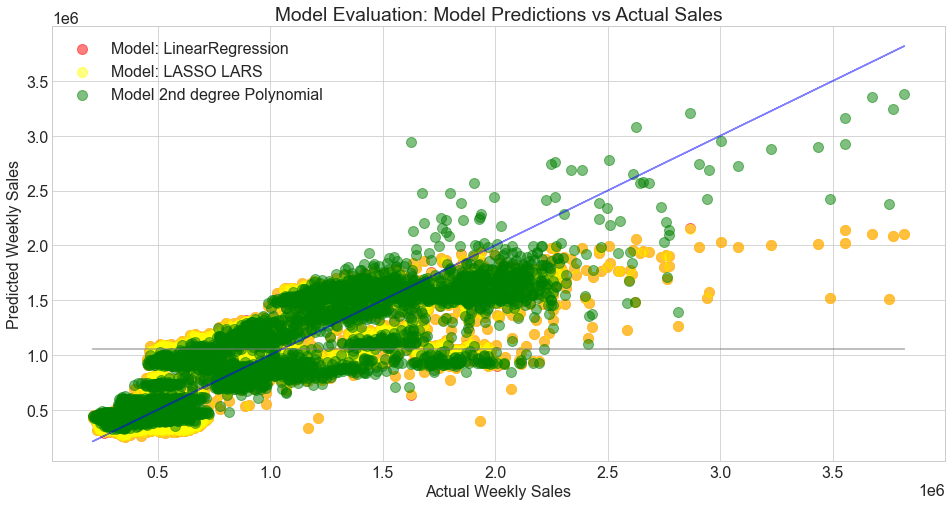

In [370]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_train.actual, y_train.baseline, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_train.actual, y_train.actual, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_train.actual, y_train.sales_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_train.actual, y_train.sales_pred_lars, 
            alpha=.5, color="yellow", s=100, label="Model: LASSO LARS")
plt.scatter(y_train.actual, y_train.sale_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Model Evaluation: Model Predictions vs Actual Sales")
plt.show()

***
Takeaways:
* All three of our model predictions appear tightly clustered arond lower weekly sales data
    * as weekly sales figures rise, our models begin to diverge with the Polynomial Regressor significntly outperforming the other models in this higher sales segment
        * LASSO LARS appears to be penalizing our seasonal spikes as outliers
        * OLS appears to be underestimating the impact of our seasonal factors
        * The Polynomial Regressor appears to best capture the rate at which our seasonal factors impact sales
***       

### Residuals: Plotting the errors

Text(0.5, 1.0, 'Visualizing model errors?')

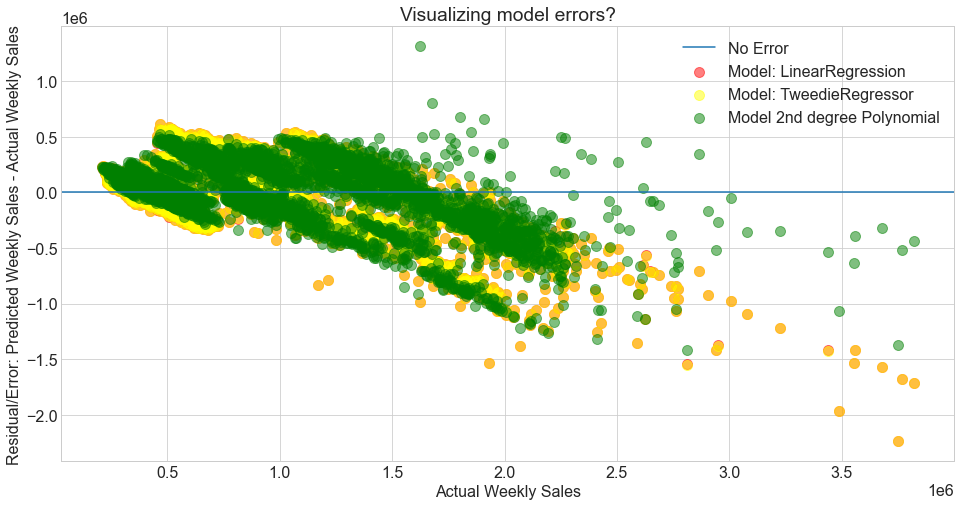

In [372]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_train.actual, y_train.sales_pred_lm-y_train.actual, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_train.actual, y_train.sales_pred_lars-y_train.actual, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_train.actual, y_train.sale_pred_lm2-y_train.actual, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Residual/Error: Predicted Weekly Sales - Actual Weekly Sales")
plt.title("Visualizing model errors?")

***
Takeaways:
* Again our residuals confirm the our findings above
    * There does appear to be linear predictive loss in our non-Polynomial model
***      

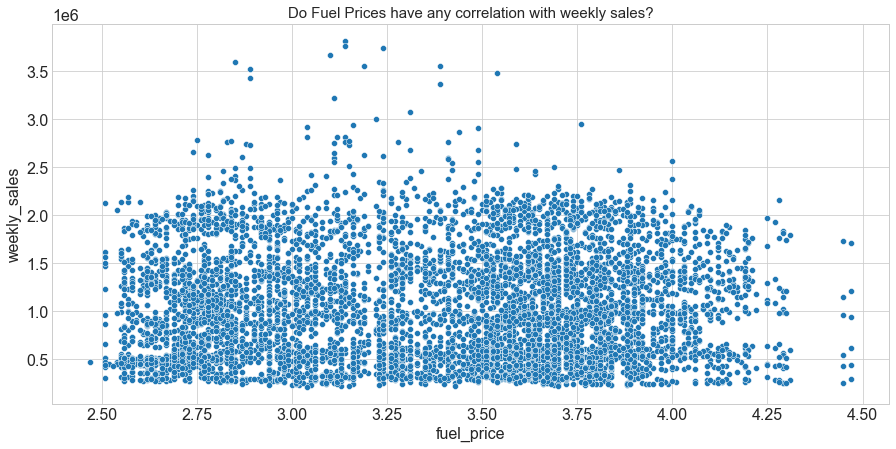

In [354]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, y = 'weekly_sales', x = 'fuel_price')
plt.title('Do Fuel Prices have any correlation with weekly sales?', fontsize = 15)
plt.show()

In [246]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = A, y = 'deflated_series', x = 'fuel_price')
plt.title('Do Fuel Prices have any correlation with weekly sales?', fontsize = 15)
plt.show()


df.deflated_series.resample('M').last().diff(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Deflated Sales ')

df.fuel_price.resample('M').last().diff(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Fuel Price')

ValueError: Could not interpret value `fuel_price` for parameter `x`

<Figure size 1080x504 with 0 Axes>

#### Unemployment vs target

### Prophet

In [53]:
from prophet import Prophet
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()

In [32]:
X_train.deflated_series.groupby('Date').agg('sum').tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
#Prophet requires start with a dataframed that includes DS (dates) & Y (target) columns

In [80]:
prophet = X_train.deflated_series.groupby('Date').agg('sum').reset_index()
prophet = prophet.rename(columns={'Date':'ds', 'deflated_series':'y'})
prophet.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [35]:
m = Prophet()
m.fit(prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods=365)
future.tail(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

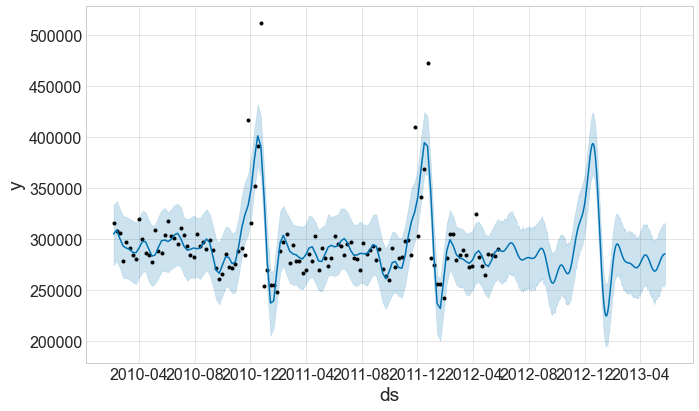

In [63]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
fig1 = m.plot(forecast)

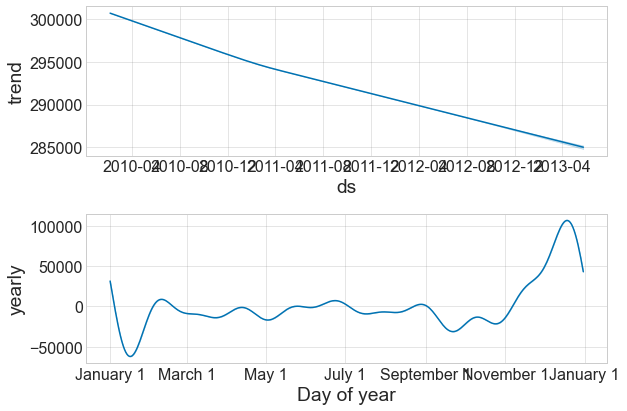

In [70]:
fig2 = m.plot_components(forecast)

In [71]:
fig = plot_plotly(m, forecast)
py.iplot(fig)

In [72]:
plot_components_plotly(m, forecast)

In [ ]:
plt.figure(figsize=(16, 14))

for i in range(1,11):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df, x=df.groupby('Date').weekly_sales.agg('sum'), y=df.groupby('Date').fuel_price.agg('mean').shift(-i), hue='store_type')
    plt.xlabel('$sales$')
    plt.ylabel(f'$fuel price - {i}')
    plt.title(f'Lag plot with lag={i}')

#### Unemployment vs target

Text(0.5, 1.0, 'Lag plot with lag=26')

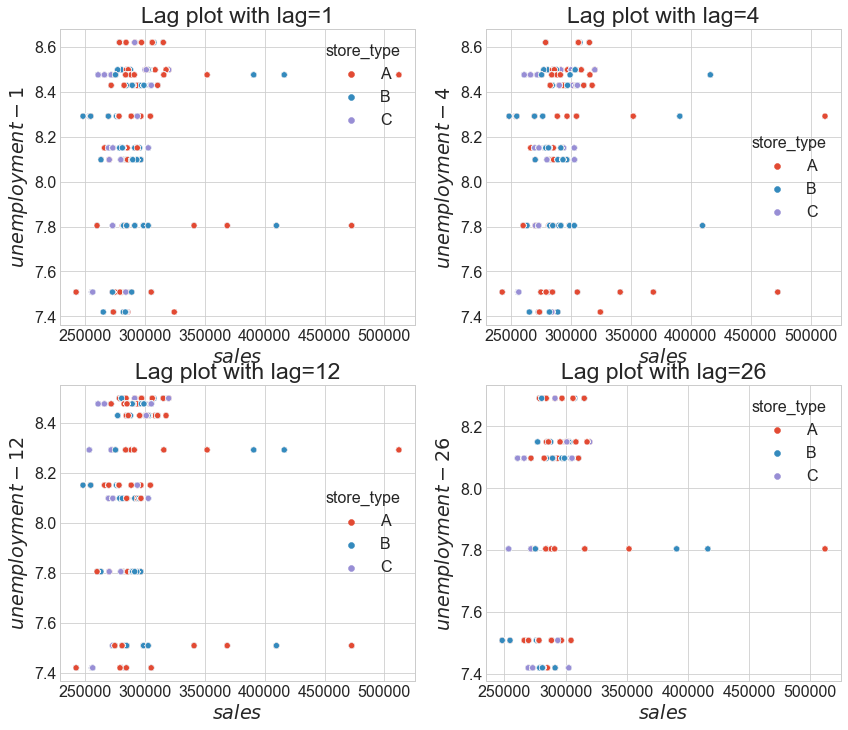

In [94]:
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(data=X_train, x=Y_train.groupby('Date').deflated_series.agg('sum'), y=X_train.groupby('Date').unemployment.agg('mean').shift(-1), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$unemployment - 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(data=X_train, x= X_train.groupby('Date').deflated_series.agg('sum'), y=X_train.groupby('Date').unemployment.agg('mean').shift(-4), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$unemployment - 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(data=X_train, x=X_train.groupby('Date').deflated_series.agg('sum'), y=X_train.groupby('Date').unemployment.agg('mean').shift(-12), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$unemployment - 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(data=X_train, x=X_train.groupby('Date').deflated_series.agg('sum'), y=X_train.groupby('Date').unemployment.agg('mean').shift(-52), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$unemployment - 26$')
plt.title('Lag plot with lag=26')

#### Temperature vs target

Text(0.5, 1.0, 'Lag plot with lag=26')

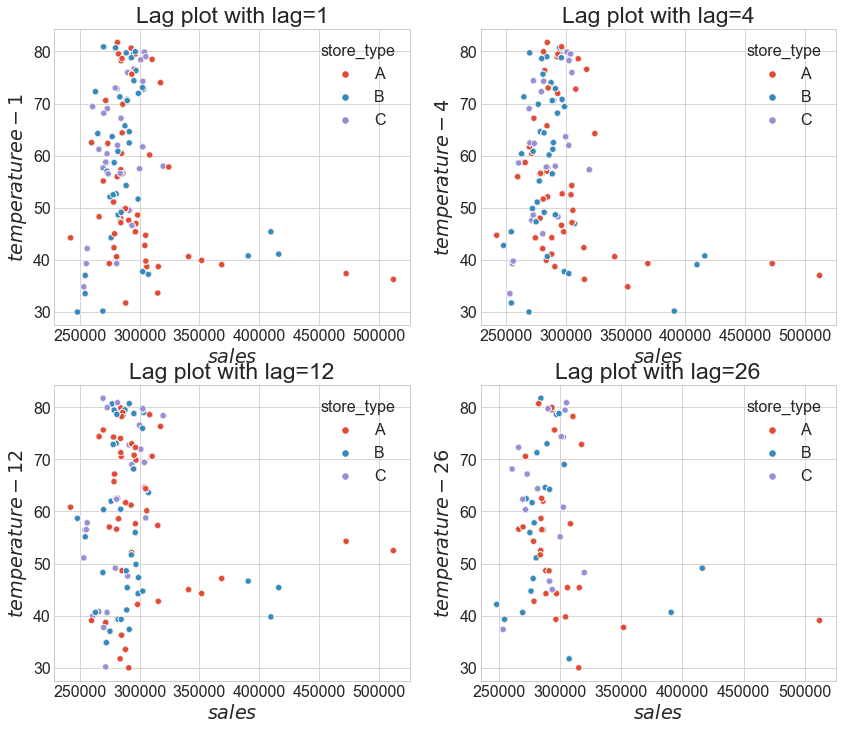

In [98]:
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(data=X_train, x=X_train.groupby('Date').deflated_series.agg('sum'), y=X_train.groupby('Date').temperature.agg('mean').shift(-1), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$temperaturee - 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(data=X_train, x= X_train.groupby('Date').deflated_series.agg('sum'), y=X_train.groupby('Date').temperature.agg('mean').shift(-4), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$temperature - 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(data=X_train, x=X_train.groupby('Date').deflated_series.agg('sum'), y=X_train.groupby('Date').temperature.agg('mean').shift(-12), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$temperature - 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(data=X_train, x=X_train.groupby('Date').deflated_series.agg('sum'), y=X_train.groupby('Date').temperature.agg('mean').shift(-52), hue='store_type')
plt.xlabel('$sales$')
plt.ylabel('$temperature - 26$')
plt.title('Lag plot with lag=26')

### Calcultate Baseline RMSE using same values from prior

In [100]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 2)
    return rmse

In [101]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.2f}'.format(rmse))
    plt.show()

In [102]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py:918: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/core/frame.py:628: UserWarning:Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/core/frame.py", line 590, in _ipython_display_
    self.maintain_recs()
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/core/frame.py", line 445, in maintain_recs
    rec_df.show_all_column_vis()
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/core/frame.py", line 359, in show_all_column_vis
    vis = Vis(list(self.columns), self)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/vis/Vis.py", line 40, in __init__
    self.refresh_source(self._source)
  File "/opt/homebrew/anaconda3/lib/p

Empty DataFrame
Columns: [model_type, target_var, rmse]
Index: []

In [103]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [140]:
# Group the original dataframe by store id for congruence going forward
df_ord = df.sort_values(['Date', 'store_id'])

In [141]:
X_train_ord, y_train_ord, X_test_ord, y_test_ord = new_wrangle.train_test(df_ord,'weekly_sales')

X_train -> (5445, 20)
X_test -> (990, 20)


In [174]:
train = y_train_ord['2011-06-01':'2011-10-28']
test = y_test_ord

In [175]:
train.shape, test.shape

((990,), (990,))

In [171]:
# checking the congruence of dates
train.tail(1), test.tail(1)

(Date
 2011-10-28    781694.57
 Name: weekly_sales, dtype: float64,
 Date
 2012-10-26    760281.43
 Name: weekly_sales, dtype: float64)

In [176]:
# make predictions
yhat_df = y_train_ord['2011-06-01':'2011-10-28']
test_df.index = test.index

In [177]:
yhat_df.head(1), yhat_df.tail(1)

(Date
 2012-06-01    1635078.41
 Name: weekly_sales, dtype: float64,
 Date
 2012-10-26    781694.57
 Name: weekly_sales, dtype: float64)

In [178]:
test.head(1), test.tail(1)

(Date
 2012-06-01    1624477.58
 Name: weekly_sales, dtype: float64,
 Date
 2012-10-26    760281.43
 Name: weekly_sales, dtype: float64)

NameError: name 'DataFrame' is not defined

In [190]:
import new_wrangle
df2 = new_wrangle.wrangle_walmart()

/Users/albertopuentes/Desktop/codeup-data-science/capstone/new_wrangle.py:65: FutureWarning:weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


In [173]:
df.head()

store_id  weekly_sales  holiday_flag  temperature  fuel_price  \
Date                                                                       
2010-02-05        1    1643690.90             0           42        2.57   
2010-02-05       10    2193048.75             0           54        2.96   
2010-02-05       37     536006.73             0           45        2.57   
2010-02-05       17     789036.02             0           23        2.67   
2010-02-05       30     465108.52             0           39        2.57   

                CPI  unemployment store_type  store_size holiday_name  \
Date                                                                    
2010-02-05  211.096         8.106          A      151315   no_holiday   
2010-02-05  126.442         9.765          B      126512   no_holiday   
2010-02-05  209.853         8.554          C       39910   no_holiday   
2010-02-05  126.442         6.548          B       93188   no_holiday   
2010-02-05  210.753         8.324          C       42988   no_holiday   

               month  year  quarter weekday  week_of_year  deflated_series  \
Date                                                                         
2010-02-05  February  2010        1  Friday             5          7786.46   
2010-02-05  February  2010        1  Friday             5         17344.31   
2010-02-05  February  2010        1  Friday             5          2554.20   
2010-02-05  February  2010        1  Friday             5          6240.30   
2010-02-05  February  2010        1  Friday             5          2206.89   

            sales_delta_weekly  sales_delta_yearly  gas_delta_weekly  \
Date                                                                   
2010-02-05                 0.0                 0.0               0.0   
2010-02-05                 0.0                 0.0               0.0   
2010-02-05                 0.0                 0.0               0.0   
2010-02-05                 0.0                 0.0               0.0   
2010-02-05                 0.0                 0.0               0.0   

            gas_delta_yearly  last_year_sales  last_week_sales  pre_christmas  \
Date                                                                            
2010-02-05               0.0              NaN              NaN              0   
2010-02-05               0.0              NaN              NaN              0   
2010-02-05               0.0              NaN              NaN              0   
2010-02-05               0.0              NaN              NaN              0   
2010-02-05               0.0              NaN              NaN              0   

            tax_season  season  
Date                            
2010-02-05           0  Winter  
2010-02-05           0  Winter  
2010-02-05           0  Winter  
2010-02-05           0  Winter  
2010-02-05           0  Winter